# 1.Backward Elimination

        In backward elimination,we start with all the predictors and remove them one by one if they aren't significantly contributing to the model.Think of it like starting with a big set of ingredients for a recipe and gradually removing ones that don't affect the taste much.

## Steps in Backward Elimination:
### 1. Fit the Full Model:
        Start with a model that includes all independent variables(features).
### 2.Select a Significant Level:
        Choose a significant level,often denoted as SL(e.g.,0.05) ,to decide whether a variable should stay in the model.
### 3.Fit Model and check p-values:
        Fit the model and for each variable,check its p-value (statistical significance).The p-value indicates the probability that the variable's coefficient is zero(i.e., it has no effect).
### 4.Eliminate the Highest p-value:
        * If the highest p-value is greater than the chosen significance level(SL),remove that variable from the model.
        * Refit the model with remaining variables.
### 5.Repeat Until All variables are significant:
        Continue the process untill all remaining variables have p-value below the chosen significance level.These variables are considered statistically significant and are retained in the final model.
        

        This process helps to simplify the model by keeping only the most relevant predictors .

# 2. Forward Selection

        Forward Selection is a stepwise regression technique used in Multiple Linear Regression(MLR) to select the most significant predictors incrementally.In this process ,we start with no features in the model and add them one at a time based on their significance in predicting the dependent variables.This helps build a more interpretable model by only including important varaibles.

## steps in Forward Selection
### 1.Initialize with No Variable:
        Start with an empty model(no features).
### 2.Choose a Significance Level:
        Set a significance level(SL),such as 0.05,to decide if a variable should be added to the model.
### 3.Add the most Significant Variable:
        * For each iteration ,test each remaining variable to see which one would improve the model the most if added.
        * Use the p-value (or another evaluation metric) to decide which variable is the most significant predictor of the dependent variable when added to the current model.
### 4.Check the p-value:
        * If the p-value of the new variable is below the chosen significance level(SL),add it to the model.
        * If no variables have a p-value below SL,stop the process.
### 5.Repeat:
        * Continue adding variables one by one until no additional variables significantly improve the model.


        with forward selection,we gradually up the model by adding only the predictors that make a meaningful difference.

# Why Use These Methods?

        Both methods help in selecting the best subset of predictors:
        
### 1. They reduce unnecessary complexicity.:
        By removing irrelevant or redundant features, feature selection simplifies the model. This reduction in complexity helps make the training process more efficient and can lead to a faster model with fewer computations.
### 2. They make the model easier to interpret:
        Focusing on a smaller set of meaningful features makes it easier to understand the relationships in the data. Interpretability is especially important in fields like healthcare and finance, where understanding model decisions is crucial.
### 3. They help avoid overfitting by focusing on predictors that have the strongest relationship with the outcome:
        Including too many features increases the risk of overfitting, where the model learns noise instead of the true pattern. By selecting only the most relevant predictors, feature selection helps generalize the model better on new, unseen data, thus improving its predictive power.

# <font color='Darkblue'>Implementing the model using Backward and Forward Elimination<font>

## 1.Data Preprocessing

In [4]:
#Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Load the Dataset
dataset=pd.read_csv('housing.csv')

In [7]:
dataset.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


#### Insights about the dataset:
        RM — Average number of rooms per house.
        LSTAT — Percentage of lower-status population.
        PTRATIO — Pupil-to-teacher ratio by town.
        TARGET — Median value of owner-occupied homes in thousands of USD.


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
dataset.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


        Then we check if we have Nan values but we don't have any null values in this datset.

In [10]:
dataset.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

        Checking for any duplicated values or not

In [11]:
dataset.duplicated().sum()

0

# Data Visuals

        Now we see the Pairplot for knowing the data scatters

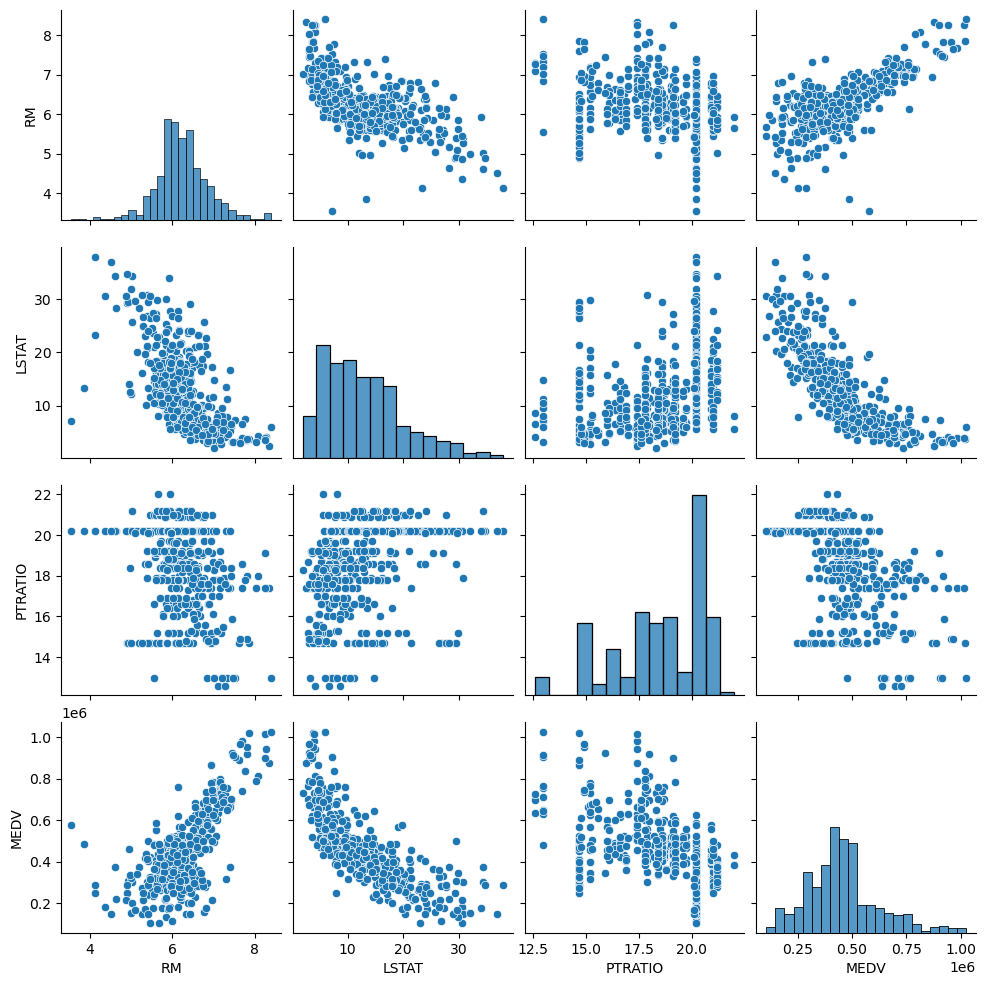

In [12]:
sns.pairplot(dataset)
plt.show()

  ##  Data Preprocessing

        How we start with preprocessing our data both with standard scalar and the minmax scalar to be do the polynomial regression.

In [13]:
#split the data into predictors (X) and target variable (Y) 
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,3].values

In [14]:
X

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [15]:
Y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [16]:
#Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
X_test

array([[ 5.834,  8.47 , 21.   ],
       [ 6.842,  6.9  , 13.   ],
       [ 5.403, 26.82 , 14.7  ],
       [ 6.852, 19.78 , 20.2  ],
       [ 6.417,  8.81 , 17.8  ],
       [ 6.406, 19.52 , 20.2  ],
       [ 4.903, 29.29 , 14.7  ],
       [ 6.112, 12.67 , 20.2  ],
       [ 6.163, 11.34 , 18.   ],
       [ 5.965, 13.83 , 21.   ],
       [ 6.223, 21.78 , 20.2  ],
       [ 5.837, 15.69 , 20.2  ],
       [ 6.041,  7.7  , 19.6  ],
       [ 4.628, 34.37 , 20.2  ],
       [ 6.727,  9.42 , 20.9  ],
       [ 5.757, 17.31 , 21.2  ],
       [ 6.279, 11.97 , 18.7  ],
       [ 6.51 ,  7.39 , 14.7  ],
       [ 5.807, 16.03 , 18.6  ],
       [ 6.739,  4.69 , 15.2  ],
       [ 7.327, 11.25 , 13.   ],
       [ 7.135,  4.45 , 17.   ],
       [ 4.519, 36.98 , 20.2  ],
       [ 5.85 ,  8.77 , 19.2  ],
       [ 5.569, 15.1  , 19.2  ],
       [ 7.645,  3.01 , 14.9  ],
       [ 7.333,  7.79 , 13.   ],
       [ 7.61 ,  3.11 , 14.7  ],
       [ 6.395, 13.27 , 20.2  ],
       [ 6.019, 12.92 , 19.2  ],
       [ 6

In [18]:
Y_test

array([417900., 632100., 281400., 577500., 474600., 359100., 247800.,
       474600., 449400., 411600., 214200., 214200., 428400., 375900.,
       577500., 327600., 420000., 489300., 470400., 640500., 651000.,
       690900., 147000., 441000., 367500., 966000., 756000., 888300.,
       455700., 445200., 323400., 455700., 430500., 867300., 445200.,
       875700., 415800., 268800., 590100., 497700., 231000., 315000.,
       388500., 449400., 413700., 352800., 453600., 306600., 898800.,
       514500., 743400., 474600., 600600., 304500., 661500., 489300.,
       422100., 184800., 525000., 249900., 407400., 361200., 428400.,
       392700., 428400., 472500., 258300., 550200., 346500., 199500.,
       302400., 611100., 396900., 585900., 279300., 483000., 462000.,
       218400., 518700., 420000., 392700., 980700., 455700., 514500.,
       480900., 520800., 485100., 525000., 390600., 569100., 359100.,
       346500., 283500., 344400., 459900., 464100., 432600., 617400.])

In [19]:
# scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

## 2.Building and Visualizing the Model

In [21]:
#Building the Multiple Linear Regression Model

from sklearn.linear_model import LinearRegression
import numpy as np

#initialise the model
regressor=LinearRegression()
#fit the model on the training data
regressor.fit(X_train,Y_train)


LinearRegression()

In [22]:

#Make predictions on the test data
Y_pred=regressor.predict(X_test)   
X_pred= regressor.predict(X_train) 


## Visulizing Actual & Preicted prices

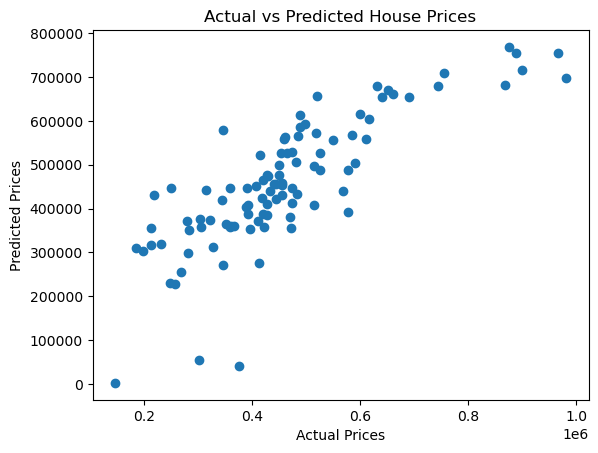

In [23]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



In [24]:
Y_pred=regressor.predict(X_test) 
X_pred=regressor.predict(X_train) 
print('Train Score: ', regressor.score(X_train, Y_train))   
print('Test Score: ', regressor.score(X_test, Y_test))   

Train Score:  0.7326740414596575
Test Score:  0.6574622113312862


In [26]:
#Metrics to check the score of Model Performance
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.6574622113312862

## 3.Feature Selection : Backward Elimination and Forward Selection

        Using Feature selection helps optimize the model by focusing on significant predictors.

### When and Why Use Feature Selection

        * Use feature selection when there are many predictors and you want to simplify the model.
        * Backward Elimination is preffered when you want to start with variables and gradually remove those with less impact.
        * Forward Selection is preffered when you want to start with no predictors and the most important ones one-by-one.

### Applying Backward Elimination

        Backward elimination removes predictors one by one based on their p-values.

In [27]:
import statsmodels.api as sm
#Adding a constant to the model for the interecept
# In our Linear regression y=b0+B1*x1--> In this b0 is a constant that we are adding.

X_train_sm=sm.add_constant(X_train)


In [28]:
X_train_sm

array([[ 1.        , -0.03187316,  0.04649813,  0.78568433],
       [ 1.        , -1.24840058,  0.74833711,  0.78568433],
       [ 1.        , -1.36974219,  0.98085693,  0.78568433],
       ...,
       [ 1.        , -0.32433755, -0.37004046, -0.36758671],
       [ 1.        , -0.3103366 ,  0.84248624, -0.31953375],
       [ 1.        , -0.32589321, -0.39714399, -0.94422223]])

In [29]:
#Build the model with all predictors
model=sm.OLS(Y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     353.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          1.83e-110
Time:                        11:15:11   Log-Likelihood:                -4992.5
No. Observations:                 391   AIC:                             9993.
Df Residuals:                     387   BIC:                         1.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.526e+05   4317.621    104.838      0.000    4.44e+05    4.61e+05
x1          5.279e+04   5400.083      9.777      0.000    4.22e+04    6.34e+04
x2         -8.084e+04   5564.728    -14.527      0.000   -9.18e+04   -6.99e+04
x3         -4.042e+04   4684.392     -8.630      0.000   -4.96e+04   -3.12e+04
==============================================================================
Omnibus:                       53.095   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.500
Skew:                           0.854   Prob(JB):                     1.22e-18
Kurtosis:                       4.465   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 1. Inspect the p-values in the output
* 2. Remove the predictor with the highest p-value(>0.05).
* 3. Return the model without this predictor and repeat until all predictors have p-values.

# Example 2:

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:

df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [97]:

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [98]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,4].values

In [99]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [100]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [101]:

# converting categorical values to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
ct=ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X),dtype=np.float64)

In [102]:
X[1:10]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2333488e+05,
        1.0867917e+05, 3.0498162e+05]])

In [103]:

# to avoid Dummy variable we are removing one column
X=X[:,1:]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [105]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [106]:
Y_pred=regressor.predict(X_test)

In [107]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9347068473282446

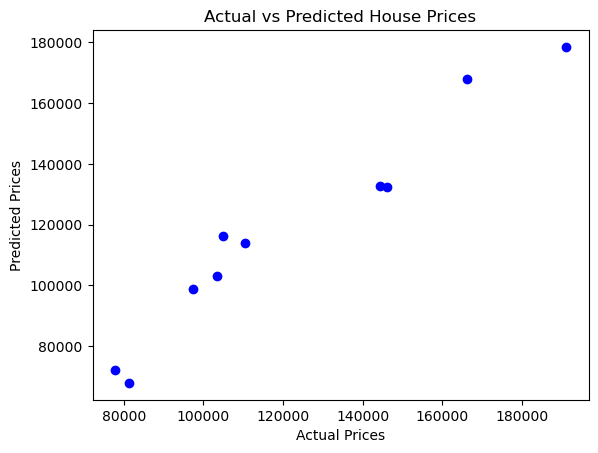

In [108]:
plt.scatter(x=Y_test,y=Y_pred ,color='blue')
# import seaborn as sns
# plt.scatter(x=X_train,y=Y_train,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [109]:
# To Increase accuaracy we are using Backward Elimination Technique
import statsmodels.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1) # Y=Mx+c--> c is a constant
X_opt=X[:,[0, 1, 2, 3, 4, 5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.34e-27
Time:                        12:00:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
X_opt=X[:,[0, 1, 3, 4, 5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           8.49e-29
Time:                        12:02:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
X_opt=X[:,[0, 2, 3, 4, 5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           8.50e-29
Time:                        12:03:08   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
x1          -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
X_opt=X[:,[0, 3,4, 5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.53e-30
Time:                        12:04:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
X_opt=X[:,[0, 3, 4,5]]
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.16e-31
Time:                        12:04:29   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [119]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


        So, Finally we can say our most powerfull independent variables are 3,4,5 that means R&D Spend,	Administration	,Marketing Spend	

## forward selection Example

        With forward selection ,we add predictors one at a time based on the model's performance.

In [162]:
import statsmodels.api as sm

# Initialize empty lists for selected and remaining features
selected_features = []
remaining_features = list(range(X.shape[1]))  # Assume features are in X
SL = 0.05

# Forward Selection Loop
while remaining_features:
    p_values = []
    for feature in remaining_features:
        # Test the model with the current feature added
        test_features = selected_features + [feature]
        X_opt = sm.add_constant(X[:, test_features])
        model = sm.OLS(Y, X_opt).fit()
        p_values.append((model.pvalues[-1], feature))  # Capture p-value and feature index

    # Find the feature with the lowest p-value
    p_values.sort()  # Sort by p-value
    best_p, best_feature = p_values[0]

    # Add the feature if its p-value is below SL
    if best_p < SL:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break  # Stop if no features meet the criteria

# Final model with selected features
X_opt = sm.add_constant(X[:, selected_features])
final_model = sm.OLS(Y, X_opt).fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          9.96e-133
Time:                        22:40:55   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.155e+05   6.88e+04      6.035      0.000     2.8e+05    5.51e+05
x1         -1.085e+04    732.138    -14.819      0.000   -1.23e+04   -9410.786
x2          8.657e+04   7888.895     10.973      0.000    7.11e+04    1.02e+05
x3         -1.949e+04   2039.047     -9.559      0.000   -2.35e+04   -1.55e+04
==============================================================================
Omnibus:                       57.976   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.413
Skew:                           0.772   Prob(JB):                     1.41e-20
Kurtosis:                       4.451   Cond. No.                         416.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <center><font color='Darkblue'>Evaluating Regression Models: Metrices</font></center>

        Evaluating model performance helps understand how well it fits the data.Here are common metrics:

# <font color='#FF33A1'> 1.Mean Absolute Error(MAE):<font>
        It is measured by taking the average of the absolute difference between actual values and the predictions.

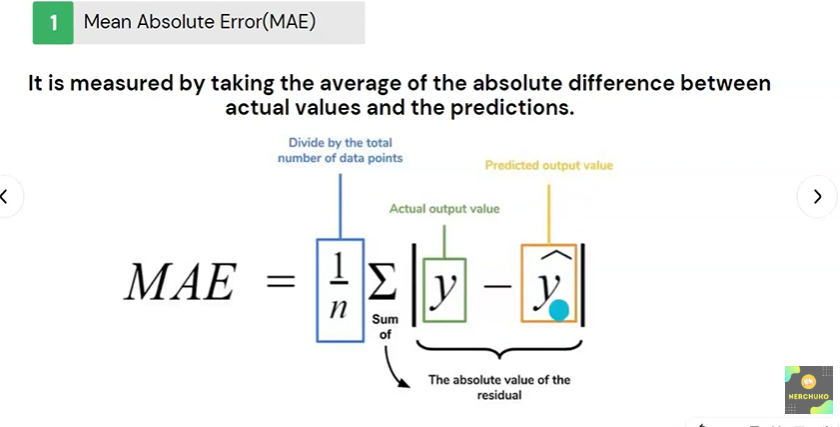

In [2]:
from PIL import  Image
Image.open('s80.png')

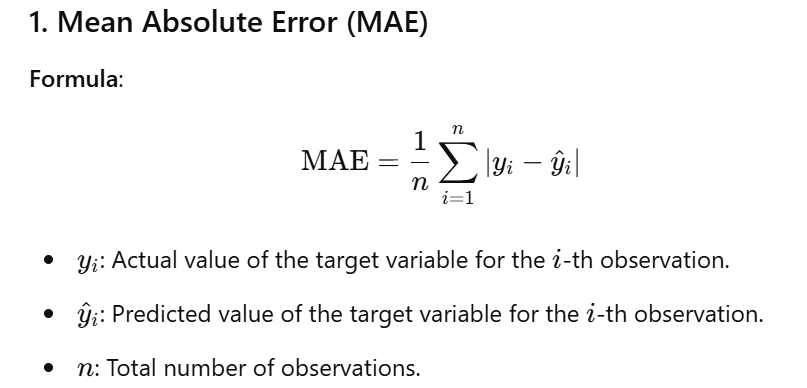

In [174]:
from PIL import Image
Image.open('m1.png')

#### Explanation:
         MAE calculates the average of the absolute errors between predicted and actual values. Each error is treated equally, making MAE easy to interpret in the original units of the target variable.

#### Use Case :
         MAE is often chosen when interpretability in terms of the target variable is essential and when outliers should not significantly impact the error measurement.

# <font color='#FF33A1'>2. Mean Squared Error<font>

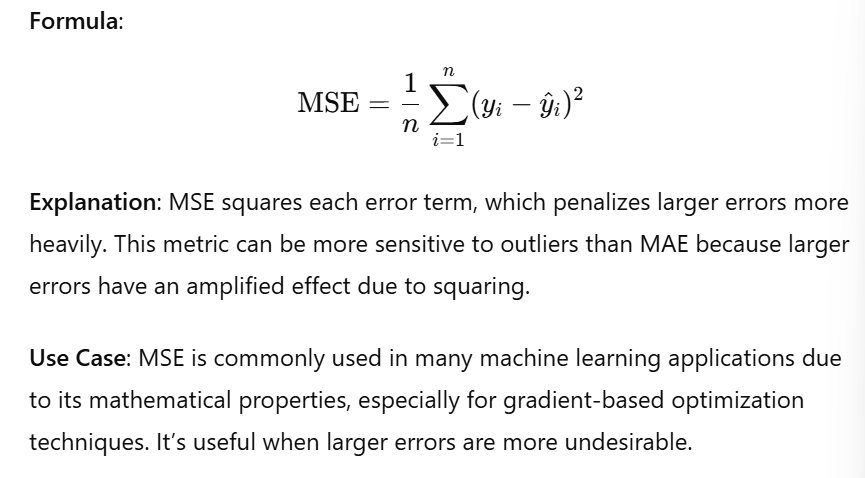

In [180]:
Image.open('r2.png')

## 3.Root Mean Squared Error (RMSE)

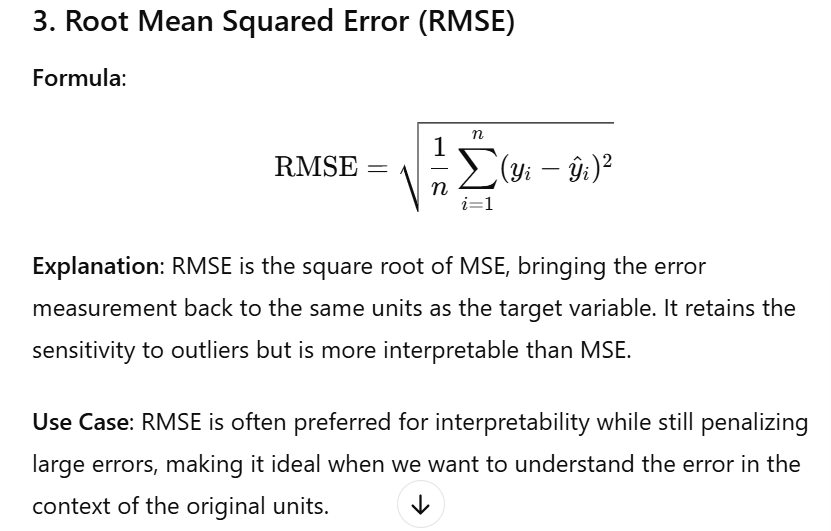

In [182]:
Image.open('r3.png')

        If the root Mean Squared Error is high ,We say the model doesn't perform well, If the Mean Sqauered Error is Low that we say the model Performing well and We can say If we give test data ,It will predict the good accuarcy value 

        Only considering  Root Measn Squared error that we can't  say the model will perform well further that overcome we use R2.

## 4.R -Squared(R²):

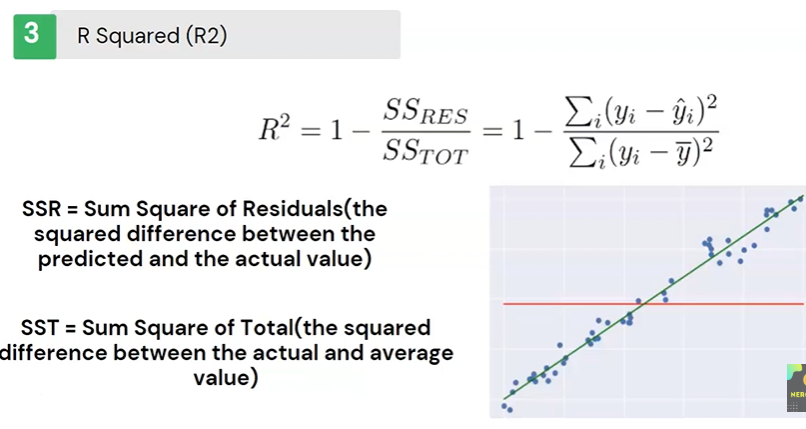

In [3]:
Image.open('s81.png')

        Average value means significant level to calculate average distance from values.

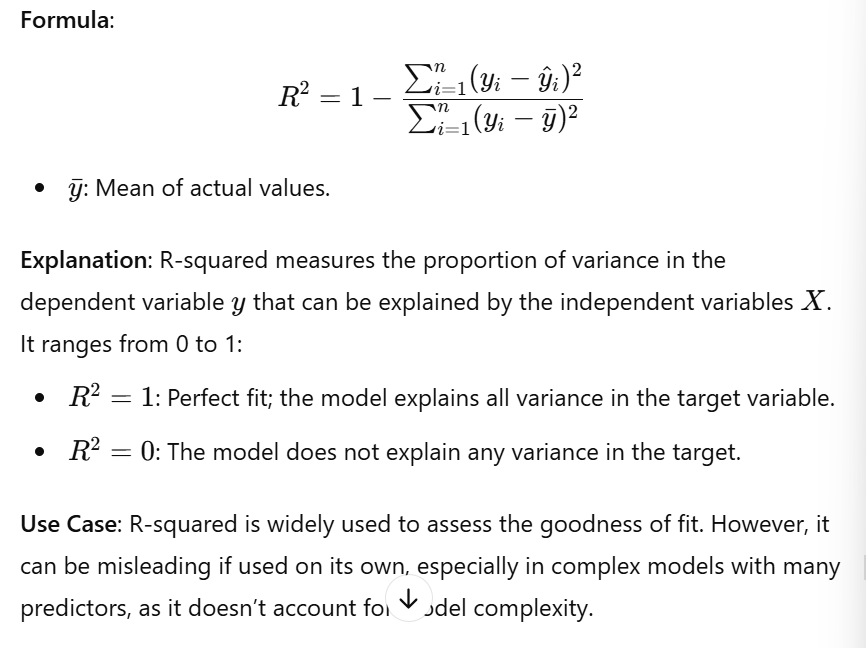

In [186]:
Image.open('r4.png')

        SSR=Sum Square of Residuals(the squared difference between the predicted and the actual value)
        
        SST=Sum Square of Total(the squared difference between the actual and average value)

### Problems with R Squared

        As number of independence values increase the value of R Squared will either increase but will never decrease.
        
        Hence we will not know how good of a influence does this newly added independence variable has on our dependent variable.
        Reason for this is that any independence variable has tendency of slightly correlation with the dependent variable.This might help reducing the SSres value hence the value of R Squared increases.

        R-Squared also known as Coefficient of Determination is a value between 0 and 1 that measures how well our regression line fits our data.The closer R-Squared is to 1 or 100% the better our model will be at predicting our dependnet varaible.

        Will take one Example to know Exactly what happpens if we considered only R-Sqaured ,If give random new independent variable to the model which is not correlated with dependent variable that means ,that independent variable doesn't make any sense to increase Model Performance ,but the R2 Squared always same and It doesn't decrease if it is useful or not ,It doesn't care ,there may be chance to overfitting.
        To overcome this We go for Adjusted R2 .

## Adjusted R2

        Adjusted R Squared deals with additional independent variables.
        
        This R Squared value tend to penalize the value of the R Squared if our choice of independent variable wasn't good (i.e., independent varaible had no effect on dependent varaible)
        
        Also the bias of R Square to not to decrease is handled pretty well in this adjusted R Sqaured method.

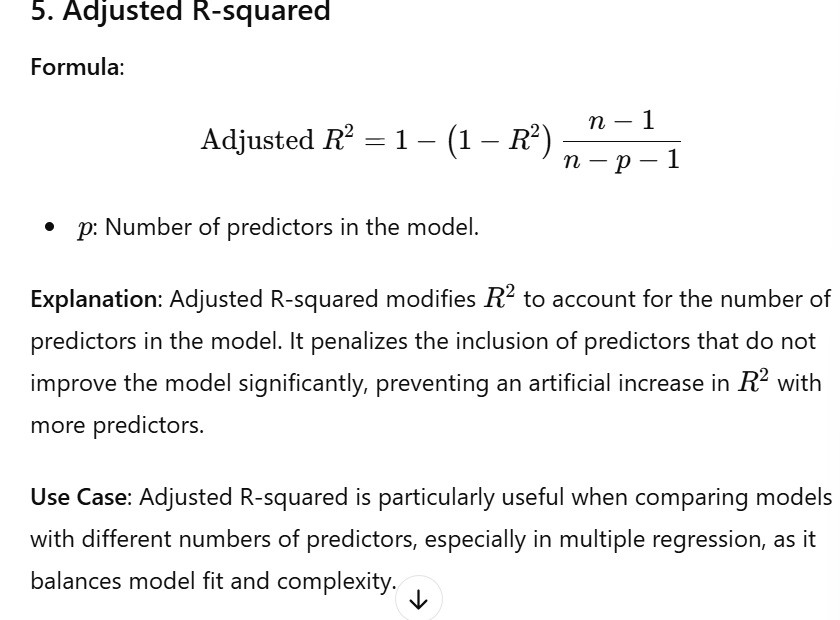

In [188]:
Image.open('r5.png')

        n is the no.of Samples in a datset.

## Summary
        * Low 𝑅2 : Points are widely scattered around the regression line, indicating poor explanatory power.
        * Moderate R2: Points are somewhat clustered around the line, suggesting the model explains part of the variance.
        * High 𝑅2 : Points are closely aligned with the regression line, meaning the model explains most of the variance.
        * Perfect R2 : All points lie exactly on the line, showing a perfect fit (very rare in practice).